Transfer functions are input to output representations of dynamic systems. One advantage of working in the Laplace domain (versus the time domain) is that differential equations become algebraic equations. These algebraic equations can be rearranged and transformed back into the time domain to obtain a solution or further combined with other transfer functions to create more complicated systems. The first step in creating a transfer function is to convert each term of a differential equation with a Laplace transform as shown in the table of Laplace transforms. 

In [1]:
import numpy as np
import control
# %% Creating the transfer function :
num = np . array ([2])
den = np . array ([5 , 1])
H = control . tf ( num , den )
H

TransferFunction(array([2]), array([5, 1]))

In [2]:
import numpy as np
import control
K1 = 2
K2 = 3
T = 4
num1 = np . array ([ K1 ])
den1 = np . array ([1 , 0])
num2 = np . array ([ K2 ])
den2 = np . array ([ T , 1])
H1 = control . tf ( num1 , den1 )
H2 = control . tf ( num2 , den2 )
H = control . series ( H1 , H2 )
H

TransferFunction(array([6.]), array([4, 1, 0]))

In [3]:

import numpy as np
import control
K1 = 2
K2 = 3
T = 4
num1 = np . array ([ K1 ])
den1 = np . array ([1 , 0])
num2 = np . array ([ K2 ])
den2 = np . array ([ T , 1])

In [4]:
H1 = control . tf ( num1 , den1 )
H2 = control . tf ( num2 , den2 )
H = control . parallel ( H1 , H2 )
H

TransferFunction(array([11,  2]), array([4, 1, 0]))

In [5]:
import numpy as np
import control
num = np . array ([2])
den = np . array ([1 , 0])
L = control . tf ( num , den )
H = control . feedback (L , 1)
H

TransferFunction(array([2]), array([1, 2]))

In [7]:
import numpy as np
import control
# %% Creating a transfer function :
num = np . array ([2])
den = np . array ([5 , 1])
H = control . tf ( num , den )
# %% Getting the num and den coeffs as lists and then as arrays :
( num_list , den_list ) = control . tfdata ( H )
num_array = np . array ( num_list )
den_array = np . array ( den_list )


In [8]:
num_array

array([[[2]]])

In [9]:
den_array

array([[[5, 1]]])

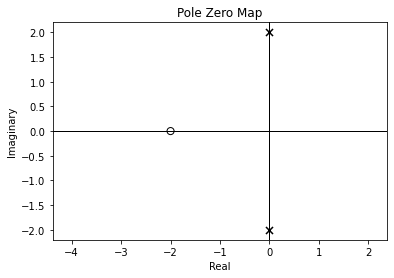

In [20]:
import numpy as np
import control
import matplotlib . pyplot as plt
num = np . array ([1 , 2])
den = np . array ([1 , 0 , 4])
H = control . tf ( num , den )
(p , z ) = control . pzmap ( H )


In [22]:
p

array([-0.+2.j,  0.-2.j])

In [23]:
z

array([-2.])

In [24]:
H

TransferFunction(array([1, 2]), array([1, 0, 4]))

In [25]:
import numpy as np
import control
import matplotlib . pyplot as plt
# %% Generating transfer function of Pade approx :
T_delay = 5
n_pade = 10
( num_pade , den_pade ) = control . pade ( T_delay , n_pade )

In [27]:
H_pade = control . tf ( num_pade , den_pade )
# %% Generating transfer function without time delay :
num = np . array ([1])
den = np . array ([10 , 1])
H_without_delay = control . tf ( num , den )
# %% Generating transfer function with time delay :
H_with_delay = control . series ( H_pade , H_without_delay) 

In [29]:
# %% Simulation of step response :
t = np . linspace (0 , 40 , 100)
(t , y ) = control . step_response ( H_with_delay , t )



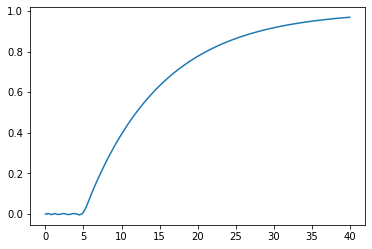

In [30]:
plt . plot (t , y )


Text(0.5, 0, 't [ s ]')

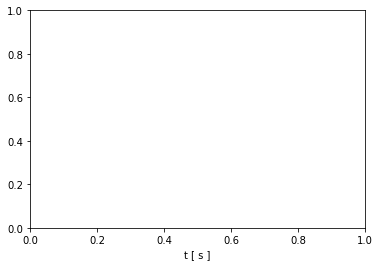

In [33]:
plt . xlabel ('t [ s ]' )


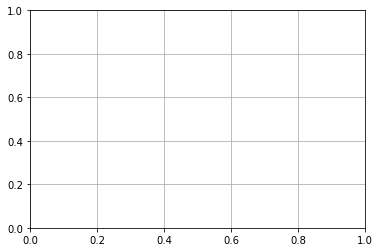

In [34]:
plt . grid ()


In [36]:
plt . savefig ('pade_approx')


<Figure size 432x288 with 0 Axes>

In [37]:
import numpy as np
import control
import matplotlib . pyplot as plt
# %% Generating Bode plot :
wb = 1 # Bandwidth [ rad / s ]
H = control . tf ([1] , [1/ wb , 1])
w0 = 0.1

In [38]:
w1 = 10
dw = 0.001
nw = int (( w1 - w0 )/ dw ) + 1 # Number of points of freq
w = np . linspace ( w0 , w1 , nw )

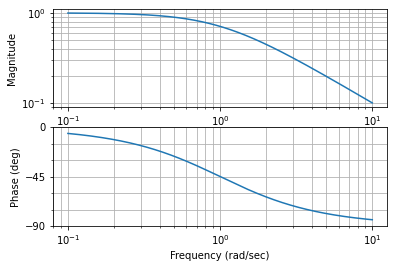

In [41]:
( mag , phase_rad , w ) = control . bode_plot (H , w )

In [42]:
import numpy as np
import control
import matplotlib . pyplot as plt
# %% Creating the loop transfer function :
Kp = 1
C = control . tf ([ Kp ] ,[1])
P = control . tf ([1] , [1 , 2 , 1 , 0])
L = control . series (C , P )
# %% Frequencies :
w0 = 0.1


In [43]:
w1 = 10
dw = 0.001
nw = int (( w1 - w0 )/ dw ) + 1 # Number of points of freq
w = np . linspace ( w0 , w1 , nw )


In [46]:
plt . close ( 'all' )


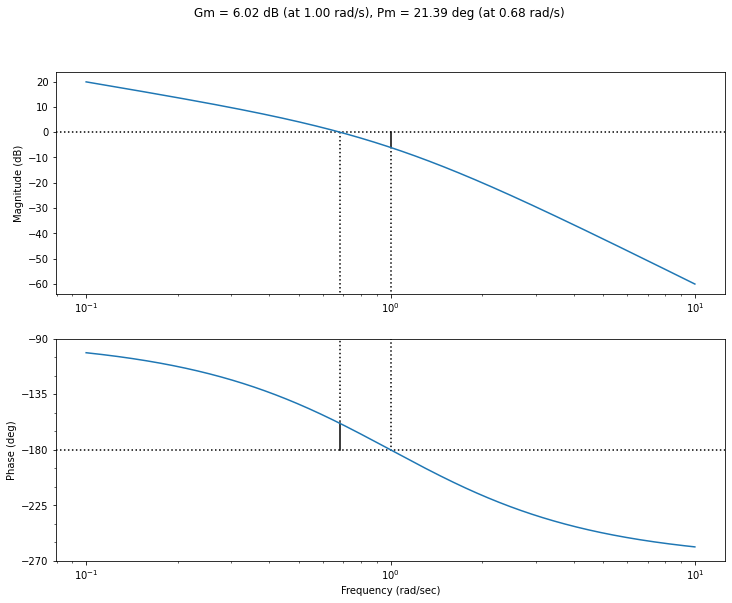

In [47]:
plt . figure (1 , figsize =(12 , 9))
( mag , phase_rad , w ) = control . bode_plot (
L , w , dB = True , deg = True , margins = True )

In [48]:
# %% Calculating stability margins and crossover frequencies :
( GM , PM , wg , wp ) = control . margin ( L )

In [50]:
GM


2.0

In [51]:
PM

21.386389751875043

In [52]:
wg

1.0

In [53]:
wp

0.6823278038280193

In [54]:
import numpy as np
import control
m = 10 # [ kg ]
k = 4 # [ N / m ]
d = 2 # [ N /( m / s )]
# %% System matrices as 2 D arrays :
A = np . array ([[0 , 1] , [ - k /m , -d / m ]])
B = np . array ([[0] , [1/ m ]])

In [55]:
C = np . array ([[1 , 0]])
D = np . array ([[0]])
# %% Creating the state space model :
S = control . ss (A , B , C , D )
S

StateSpace(array([[ 0. ,  1. ],
       [-0.4, -0.2]]), array([[0. ],
       [0.1]]), array([[1., 0.]]), array([[0.]]))

In [56]:
A


array([[ 0. ,  1. ],
       [-0.4, -0.2]])

In [57]:
B

array([[0. ],
       [0.1]])

In [58]:
C

array([[1, 0]])

In [59]:
D

array([[0]])

In [60]:
import numpy as np
import control


In [61]:
# %% Creating a state space model :
A = np . array ([[0 , 1] , [2 , 3]])
B = np . array ([[4] , [5]])
C = np . array ([[6 , 7]])
D = np . array ([[8]])


In [62]:
S = control . ss (A , B , C , D )
S

StateSpace(array([[0., 1.],
       [2., 3.]]), array([[4.],
       [5.]]), array([[6., 7.]]), array([[8.]]))

In [63]:
A

array([[0, 1],
       [2, 3]])

In [64]:
B

array([[4],
       [5]])

In [65]:
C

array([[6, 7]])

In [66]:
D

array([[8]])

In [67]:
# %% Import :
import numpy as np
import control
import matplotlib . pyplot as plt
# %% Model parameters :
m = 10 # [ kg ]
k = 4 # [ N / m ]
d = 2 # [ N /( m / s )]
# %% System matrices as 2 D arrays :
A = np . array ([[0 , 1] , [ - k /m , -d / m ]])
B = np . array ([[0] , [1/ m ]])
C = np . array ([[1 , 0]])
D = np . array ([[0]])
# %% Creating the state space model :


In [68]:
S = control . ss (A , B , C , D )

In [69]:
# %% Defining signals :
t0 = 0 # [ s ]
t1 = 50 # [ s ]
dt = 0.01 # [ s ]
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np . linspace ( t0 , t1 , nt )
F = 10* np . ones ( nt ) # [ N ]


In [70]:
# %% Initial state :
x1_0 = 1 # [ m ]
x2_0 = 0 # [ m / s ]
x0 = np . array ([ x1_0 , x2_0 ])

In [72]:
x0

array([1, 0])